# Demo Variogram with micro-lags

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../src")

In [6]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

import data_utils
import spatial_tools
import fields
import variogram as vgm

In [4]:
ds = xr.open_dataset("../data/exp_pro/OCO2_4x5deg_monthly_conus_microlag.nc")

# Format as multi-fields
ds_xco2 = ds[["xco2", "xco2_var"]]
ds_sif = ds[["sif", "sif_var"]]

var_names = ["xco2", "sif"]
cross_name = "xco2:sif"

In [61]:
# Analysis variables
month = 8
timedelta = -2
n_bins = 50
fast_dist = True

timestamps = np.array(ds.time[ds.time.dt.month == month].values, dtype="datetime64[D]")

In [74]:
mf = fields.MultiField(ds_xco2, ds_sif, timestamps[1], timedelta=timedelta, fast_dist=fast_dist)

In [75]:
mf.field_1.df_micro

,lat,lon,xco2,lon_group
0,14.0,-123.5,-1.027357,-122.5
1,14.0,-123.0,-0.751305,-122.5
2,14.0,-122.5,-0.536773,-122.5
3,14.0,-122.0,-0.570735,-122.5
4,14.0,-121.5,-0.596780,-122.5
...,...,...,...,...
595,50.0,-68.5,-1.348299,-67.5
596,50.0,-68.0,-1.342613,-67.5
597,50.0,-67.5,-1.336928,-67.5
598,50.0,-67.0,-1.331242,-67.5


In [81]:
# Apply microlag_clouds across lon_groups, concat each cloud type into it's own df (3 total), then append these dfs in empirical_variogram
df_ml = mf.field_1.df_micro.groupby(["lat", "lon_group"]).apply(vgm.microlag_clouds, "xco2")
# .reset_index().drop(columns=["lat", "lon_group", "level_2"]).dropna(subset=["distance"])

In [82]:
df_ml.head()

distance  variogram
lat  lon_group                         
14.0 -122.5    0   53.945971   0.038102
               1  107.891882   0.120336
               2  161.837673   0.104252
               3  215.783283   0.092698
               4   53.945971   0.023012

<AxesSubplot:xlabel='distance', ylabel='variogram_cross'>

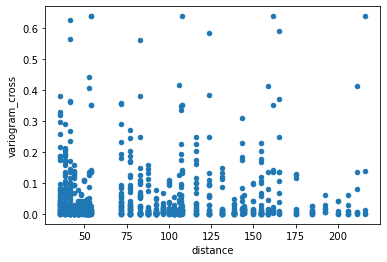

In [59]:
df_ml.plot(x="distance", y="variogram_cross", kind="scatter")